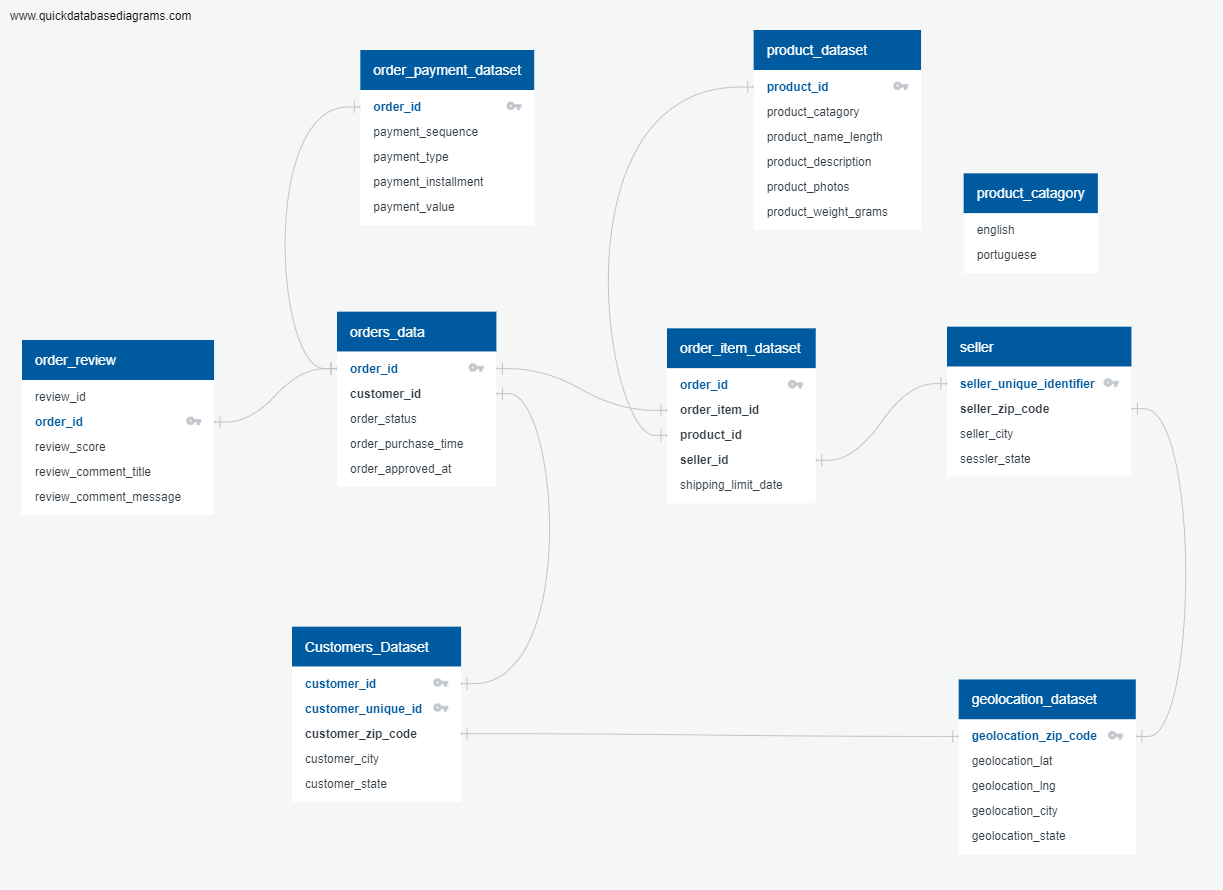

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
parse_dates = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", "review_creation_date", "review_answer_timestamp" ]
customers =  pd.read_csv("../final_database/olist_final_data.csv", infer_datetime_format = True, parse_dates = parse_dates)


In [3]:
customers.head()


,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_city,seller_state
0,91340,porto alegre,RS,-30.028941,-51.180072,3ccb27f9c7ee205656acef98c19fc061,delivered,2018-04-16,2018-04-16,2018-05-08,...,1,credit_card,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,campinas,SP
1,13635,pirassununga,SP,-21.971013,-47.426693,5f7f9c1ee727aca3b625220c95177f4f,delivered,2018-05-09,2018-05-11,2018-05-16,...,1,boleto,1,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,franca,SP
2,37975,itau de minas,MG,-20.746977,-46.749023,c4cb1295499744937c6be430505b7003,delivered,2018-08-07,2018-08-07,2018-08-08,...,1,credit_card,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,curitiba,PR
3,35720,matozinhos,MG,-19.559993,-44.085206,3f35b35a0b55d214f94c94c9e1a1deaa,delivered,2017-06-15,2017-06-15,2017-06-19,...,1,credit_card,1,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,aperibe,RJ
4,36700,leopoldina,MG,-21.526803,-42.641060,11ca735fecae936dacfea16499b4b4d7,delivered,2017-05-02,2017-05-03,2017-05-08,...,1,credit_card,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,ibitinga,SP


In [4]:
customers["time_order_to_delivery"] = customers["order_delivered_customer_date"]-customers["order_purchase_timestamp"]
customers["time_estimate_to_delivery"] = customers["order_estimated_delivery_date"]-customers["order_delivered_customer_date"]

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   zipcode                        91596 non-null  int64          
 1   customer_city                  91596 non-null  object         
 2   customer_state                 91596 non-null  object         
 3   geolocation_lat                91596 non-null  float64        
 4   geolocation_lng                91596 non-null  float64        
 5   customer_id                    91596 non-null  object         
 6   order_status                   91596 non-null  object         
 7   order_purchase_timestamp       91596 non-null  datetime64[ns] 
 8   order_approved_at              91596 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   91596 non-null  datetime64[ns] 
 10  order_delivered_customer_date  91596 non-null  datetime64[ns] 
 11  or

In [6]:
customers.head(5)

,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_city,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,porto alegre,RS,-30.028941,-51.180072,3ccb27f9c7ee205656acef98c19fc061,delivered,2018-04-16,2018-04-16,2018-05-08,...,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,campinas,SP,30 days,6 days
1,13635,pirassununga,SP,-21.971013,-47.426693,5f7f9c1ee727aca3b625220c95177f4f,delivered,2018-05-09,2018-05-11,2018-05-16,...,1,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,franca,SP,12 days,11 days
2,37975,itau de minas,MG,-20.746977,-46.749023,c4cb1295499744937c6be430505b7003,delivered,2018-08-07,2018-08-07,2018-08-08,...,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,curitiba,PR,6 days,9 days
3,35720,matozinhos,MG,-19.559993,-44.085206,3f35b35a0b55d214f94c94c9e1a1deaa,delivered,2017-06-15,2017-06-15,2017-06-19,...,1,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,aperibe,RJ,11 days,14 days
4,36700,leopoldina,MG,-21.526803,-42.641060,11ca735fecae936dacfea16499b4b4d7,delivered,2017-05-02,2017-05-03,2017-05-08,...,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,ibitinga,SP,15 days,9 days


In [7]:
customers["order_item_id"].value_counts()

1    91596
Name: order_item_id, dtype: int64

In [8]:
customers.describe()

,zipcode,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_photos_qty,seller_zip,time_order_to_delivery,time_estimate_to_delivery
count,91596.000000,91596.000000,91596.000000,91596.0,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596,91596
mean,35151.534860,-21.191323,-46.183740,1.0,125.912610,20.219324,4.143543,1.022403,2.902245,157.746153,2.257380,24701.768265,12 days 11:53:24.768767195,11 days 20:27:29.783833355
std,29817.795762,5.624239,4.067344,0.0,191.014876,15.918591,1.294079,0.234388,2.698356,217.626161,1.751246,27781.816702,9 days 14:03:45.709485852,10 days 04:24:34.611794700
min,1003.000000,-36.605374,-72.666706,1.0,0.850000,0.000000,1.000000,1.000000,0.000000,0.010000,1.000000,1001.000000,0 days 00:00:00,-188 days +00:00:00
25%,11360.000000,-23.589946,-48.119645,1.0,41.900000,13.330000,4.000000,1.000000,1.000000,60.090000,1.000000,6429.000000,7 days 00:00:00,7 days 00:00:00
50%,24431.000000,-22.925733,-46.632051,1.0,79.000000,16.400000,5.000000,1.000000,2.000000,103.160000,2.000000,13573.000000,10 days 00:00:00,12 days 00:00:00
75%,58745.000000,-20.134916,-43.616854,1.0,139.900000,21.280000,5.000000,1.000000,4.000000,175.090000,3.000000,29156.000000,16 days 00:00:00,17 days 00:00:00
max,99980.000000,42.184003,-8.577855,1.0,6735.000000,409.680000,5.000000,19.000000,24.000000,13664.080000,20.000000,99730.000000,210 days 00:00:00,147 days 00:00:00


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   zipcode                        91596 non-null  int64          
 1   customer_city                  91596 non-null  object         
 2   customer_state                 91596 non-null  object         
 3   geolocation_lat                91596 non-null  float64        
 4   geolocation_lng                91596 non-null  float64        
 5   customer_id                    91596 non-null  object         
 6   order_status                   91596 non-null  object         
 7   order_purchase_timestamp       91596 non-null  datetime64[ns] 
 8   order_approved_at              91596 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   91596 non-null  datetime64[ns] 
 10  order_delivered_customer_date  91596 non-null  datetime64[ns] 
 11  or

In [10]:
profile = ProfileReport(customers, title="Pandas Profiling Report")

In [11]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

C:\Users\manuu\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
corr_matrix = customers.corr()
corr_matrix["review_score"].sort_values(ascending=False)

review_score            1.000000
seller_zip              0.024259
product_photos_qty      0.012930
payment_sequential     -0.001028
price                  -0.007092
zipcode                -0.021043
payment_installments   -0.031362
freight_value          -0.036652
payment_value          -0.042097
geolocation_lat        -0.044469
geolocation_lng        -0.053660
order_item_id                NaN
Name: review_score, dtype: float64

In [13]:
final_customers = customers.drop(columns = ["customer_city", "customer_state", "geolocation_lat","geolocation_lng", "customer_id", "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "payment_sequential"])              
final_customers.drop(columns =["seller_city", "order_id", "review_answer_timestamp", "review_creation_date"], inplace = True)
final_customers.drop(columns =["seller_id","payment_installments", "order_item_id" ], inplace = True)
final_customers.drop(columns =["order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", "review_id"], inplace = True)
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,delivered,149.9,15.93,2,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,SP,30 days,6 days
1,13635,delivered,49.9,12.79,5,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,SP,12 days,11 days
2,37975,delivered,59.9,27.37,5,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,PR,6 days,9 days
3,35720,delivered,15.5,15.10,4,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,RJ,11 days,14 days
4,36700,delivered,143.0,15.17,5,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,SP,15 days,9 days


# Feature Engineering

#### review score

In [14]:
def partition(x):
    if x < 3:
        return 0
    return 1
final_customers['review_score']=final_customers['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score 
final_customers.review_score.value_counts()

1    79613
0    11983
Name: review_score, dtype: int64

#### delivery Status

In [15]:
def partition(x):
    if x == "delivered":
        return 1
    return 0
final_customers['order_status']=final_customers['order_status'].map(lambda cw : partition(cw) ) 
    
# checking the review score 
final_customers.order_status.value_counts()

1    91590
0        6
Name: order_status, dtype: int64

#### time_order_to_delivery"

In [16]:
final_customers["time_order_to_delivery"] = final_customers.time_order_to_delivery.apply(lambda x: x.days)
final_customers["time_estimate_to_delivery"] = final_customers.time_estimate_to_delivery.apply(lambda x: x.days)



In [17]:
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,SP,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,SP,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,PR,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,RJ,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,SP,15,9


In [18]:
final_customers.drop(columns = ["seller_state"], inplace = True)

In [19]:
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,15,9


In [20]:
final_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    91596 non-null  int64  
 1   order_status               91596 non-null  int64  
 2   price                      91596 non-null  float64
 3   freight_value              91596 non-null  float64
 4   review_score               91596 non-null  int64  
 5   payment_type               91596 non-null  object 
 6   payment_value              91596 non-null  float64
 7   product_id                 91596 non-null  object 
 8   product_photos_qty         91596 non-null  int64  
 9   product_category           91596 non-null  object 
 10  seller_zip                 91596 non-null  int64  
 11  time_order_to_delivery     91596 non-null  int64  
 12  time_estimate_to_delivery  91596 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usag

#### Product catagories

In [21]:
final_customers["product_category"] = final_customers["product_category"].astype('category')
print(final_customers.dtypes)
final_customers["product_category"] = final_customers["product_category"].cat.codes
final_customers.head()


zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                   object
payment_value                 float64
product_id                     object
product_photos_qty              int64
product_category             category
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,70,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,33,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,7,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,65,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,7,14940,15,9


# payment type

In [22]:
final_customers["product_id"] = final_customers["product_id"].astype('category')
print(final_customers.dtypes)
final_customers["product_id"] = final_customers["product_id"].cat.codes
final_customers.head()

zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                   object
payment_value                 float64
product_id                   category
product_photos_qty              int64
product_category                 int8
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,29043,1,7,14940,15,9


In [23]:
final_customers["payment_type"] = final_customers["payment_type"].astype('category')
print(final_customers.dtypes)
final_customers["payment_type"] = final_customers["payment_type"].cat.codes
final_customers.head()

zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                 category
payment_value                 float64
product_id                      int16
product_photos_qty              int64
product_category                 int8
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,1,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,0,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,1,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,1,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,1,316.34,29043,1,7,14940,15,9


In [24]:
final_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    91596 non-null  int64  
 1   order_status               91596 non-null  int64  
 2   price                      91596 non-null  float64
 3   freight_value              91596 non-null  float64
 4   review_score               91596 non-null  int64  
 5   payment_type               91596 non-null  int8   
 6   payment_value              91596 non-null  float64
 7   product_id                 91596 non-null  int16  
 8   product_photos_qty         91596 non-null  int64  
 9   product_category           91596 non-null  int8   
 10  seller_zip                 91596 non-null  int64  
 11  time_order_to_delivery     91596 non-null  int64  
 12  time_estimate_to_delivery  91596 non-null  int64  
dtypes: float64(3), int16(1), int64(7), int8(2)
mem

In [25]:
final_customers.to_csv("../final_database/final_customer.csv", index = False)

# Conenction with AWS database

In [26]:
import psycopg2
import config 
from config import PGHOST
from config import PGDATABASE
from config import PGUSER
from config import PGPASSWORD


def connect():
    
    # Set up a connection to the postgres server.
    conn_string = f"host={PGHOST} port=5432 dbname={PGDATABASE} user={PGUSER} \
                  password={PGPASSWORD}"
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [27]:
# Connecting to DB
conn, cursor = connect()

# SQL command to create inventory table
create_table = """
    CREATE TABLE IF NOT EXISTS final_customers(
        zipcode INTEGER,
        order_status INTEGER,
        price FLOAT,
        freight_value FLOAT,
        review_score INTEGER,
        payment_type INTEGER,
        payment_value FLOAT,
        product_id INTEGER,
        product_photos_qty INTEGER,
        product_category INTEGER,
        seller_zip INTEGER,
        time_order_to_delivery INTEGER,
        time_estimate_to_delivery INTEGER


    )
    """

# Execute SQL Command and commit to DB
cursor.execute(create_table)
conn.commit()

# Disconnect from DB
#disconnect(conn, cursor)

Connected!


In [28]:
with open('../final_database/final_customer.csv', 'r') as row:
    next(row)# Skip the header row.
    cursor.copy_from(row, 'final_customers', sep=',')
    

    
conn.commit()    

In [29]:
sql = """
SELECT *
FROM final_customers
"""
final_customers_sql = pd.read_sql(sql, con=conn)
final_customers_sql.head()


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,1,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,0,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,1,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,1,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,1,316.34,29043,1,7,14940,15,9


# Split the data

In [30]:
Xdata = final_customers_sql.drop(columns = ["review_score"])
ydata = pd.DataFrame(final_customers_sql['review_score'])

In [31]:
Xdata.shape

(1099152, 12)

In [32]:
ydata.shape

(1099152, 1)

In [33]:
ydata

,review_score
0,0
1,1
2,1
3,1
4,1
...,...
1099147,1
1099148,1
1099149,0
1099150,1


In [34]:
X = Xdata.values
y = ydata.values

# Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
print(X_train)

[[5.6320e+04 1.0000e+00 1.2990e+01 ... 2.5803e+04 3.0000e+01 4.0000e+00]
 [6.3650e+03 1.0000e+00 1.4460e+01 ... 1.3087e+04 4.0000e+00 9.0000e+00]
 [7.4815e+04 1.0000e+00 1.3700e+02 ... 8.9701e+04 1.4000e+01 1.3000e+01]
 ...
 [2.4241e+04 1.0000e+00 1.0000e+02 ... 8.7100e+03 9.0000e+00 1.1000e+01]
 [2.3942e+04 1.0000e+00 5.3900e+01 ... 1.5025e+04 1.5000e+01 1.4000e+01]
 [1.3327e+04 1.0000e+00 1.0000e+01 ... 3.1140e+04 1.5000e+01 5.0000e+00]]


In [37]:
print(X_test)

[[ 2.3065e+04  1.0000e+00  1.4499e+02 ...  3.4260e+03  3.2000e+01
  -6.0000e+00]
 [ 9.1340e+04  1.0000e+00  8.4900e+01 ...  3.4700e+03  1.5000e+01
   1.2000e+01]
 [ 2.0541e+04  1.0000e+00  1.1860e+03 ...  1.4801e+04  7.0000e+00
   3.0000e+01]
 ...
 [ 1.0380e+03  1.0000e+00  1.1500e+02 ...  8.9160e+04  7.0000e+00
   1.5000e+01]
 [ 2.1361e+04  1.0000e+00  1.7999e+02 ...  3.7580e+04  2.9000e+01
   7.0000e+00]
 [ 1.1025e+04  1.0000e+00  1.2880e+01 ...  1.1010e+04  3.0000e+00
   5.0000e+00]]


In [38]:
print(y_train)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [39]:
print(y_test)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## Feature Scaling

In [40]:
# rom sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Resampling 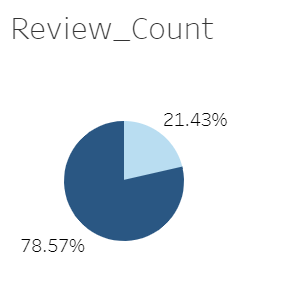

In [41]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(Counter(y_resampled))
type(y_resampled)


Counter({0: 107890, 1: 107890})


numpy.ndarray

# Logistic Regression: Linear Model.

In [42]:
from sklearn.linear_model import LogisticRegression
classifierl = LogisticRegression(random_state = 0)
classifierl.fit(X_resampled, y_resampled)

LogisticRegression(random_state=0)

In [43]:
y_pred_l = classifierl.predict(X_test)
print(np.concatenate((y_pred_l.reshape(len(y_pred_l),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 1]
 [1 1]]


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logistic = confusion_matrix(y_test, y_pred_l)
print(cm_logistic)

[[ 19942  15964]
 [ 54303 184579]]


In [45]:
accuracy_logistic = accuracy_score(y_test, y_pred_l)
accuracy_logistic

0.7442865045052913

# K-NN model 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifierk = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierk.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [47]:
y_pred_k = classifierk.predict(X_test)
print(np.concatenate((y_pred_k.reshape(len(y_pred_k),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [0 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Knn = confusion_matrix(y_test, y_pred_k)
print(cm_Knn)
accuracy_score_K = accuracy_score(y_test, y_pred_k)
accuracy_score_K

[[ 35896     10]
 [ 47422 191460]]


0.8273869310159104

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifierd = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierd.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred_d = classifierd.predict(X_test)
#print(np.concatenate((y_pred_d.reshape(len(y_pred_d,1), y_test.reshape(len(y_test),1)),1)))

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_d)
print(cm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_d)
accuracy_decision_tree

[[ 35906      0]
 [  8299 230583]]


0.9697985355983522

# Ensemble: Randon Forest


In [52]:
from sklearn.ensemble import RandomForestClassifier
classifiere = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifiere.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [53]:
y_pred_e = classifiere.predict(X_test)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_e)
print(cm)
accuracy_random_forest = accuracy_score(y_test, y_pred_e)
accuracy_random_forest

[[ 35906      0]
 [  3859 235023]]


0.9859564464241525

[1.17975568e-01 7.82979482e-05 9.94426225e-02 9.58829044e-02
 1.89869968e-02 1.12453393e-01 1.00175908e-01 3.06890369e-02
 5.81214132e-02 8.17188153e-02 1.12937579e-01 1.71537465e-01]
Feature: zipcode, Score: 0.11798
Feature: order_status, Score: 0.00008
Feature: price, Score: 0.09944
Feature: freight_value, Score: 0.09588
Feature: payment_type, Score: 0.01899
Feature: payment_value, Score: 0.11245
Feature: product_id, Score: 0.10018
Feature: product_photo_qty, Score: 0.03069
Feature: product_catagory, Score: 0.05812
Feature: seller_zip, Score: 0.08172
Feature: time_order_to_delivery, Score: 0.11294
Feature: time_estimate_to_delivery, Score: 0.17154


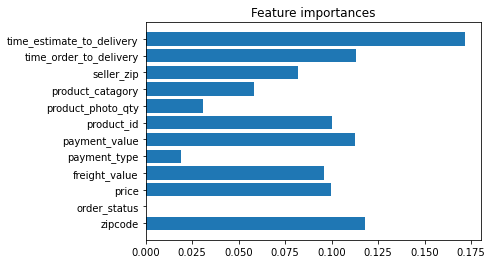

In [55]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot

feature_names = ["zipcode", "order_status", "price", "freight_value", "payment_type", "payment_value", "product_id", "product_photo_qty", "product_catagory", "seller_zip","time_order_to_delivery", "time_estimate_to_delivery"]
# get importance
importance = classifiere.feature_importances_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
plt.title("Feature importances")
plt.yticks(range(X.shape[1]), feature_names)
#plt.ylim([-1, X.shape[1]])
pyplot.show()

# Artificial Neural Networks

In [56]:
import tensorflow as tf

In [57]:
ann_model = tf.keras.models.Sequential()
# First hidden layer
#ann.add(tf.keras.layers.Dense(units=6, activation='relu')
ann_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=12))

# Second hidden layer
ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))


# Output layer
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 65        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compile the Sequential model together and customize metrics
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = ann_model.fit(X_resampled, y_resampled, epochs=100)


Epoch 1/100
6744/6744 [==============================] - 13s 2ms/step - loss: 152.5641 - accuracy: 0.4963
Epoch 2/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.7451 - accuracy: 0.5002
Epoch 3/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.6940 - accuracy: 0.5072
Epoch 4/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.6864 - accuracy: 0.5482
Epoch 5/100
6744/6744 [==============================] - 11s 2ms/step - loss: 0.6490 - accuracy: 0.6280
Epoch 6/100
6744/6744 [==============================] - 13s 2ms/step - loss: 0.6425 - accuracy: 0.6315
Epoch 7/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.6397 - accuracy: 0.6354
Epoch 8/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.6388 - accuracy: 0.6364 0s - loss: 0
Epoch 9/100
6744/6744 [==============================] - 12s 2ms/step - loss: 0.6374 - accuracy: 0.6398
Epoch 10/100
6744/6744 [=========================

# Comparison

In [59]:
# initialize list of lists
data = [['Logistic', accuracy_logistic*100], ['KNN', accuracy_score_K*100], ['Decision Tree', accuracy_decision_tree*100], ['Random_Forest', accuracy_random_forest*100], ["ANN", 0.50*100] ]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
df.set_index('Model',inplace = True)
 
# print dataframe.
df

,Accuracy
Model,
Logistic,74.428650
KNN,82.738693
Decision Tree,96.979854
Random_Forest,98.595645
ANN,50.000000


Text(0, 0.5, '% Accuracy')

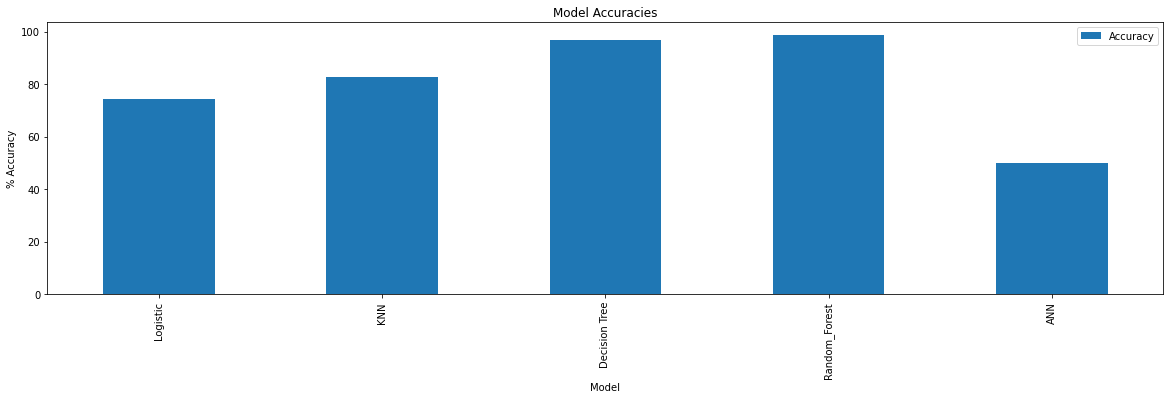

In [60]:
df.plot(kind='bar', figsize=(20, 5))
plt.title('Model Accuracies')
plt.ylabel('% Accuracy')

# Random Forest Model for Web App

In [88]:
#Xfinal = Xdata.drop(columns = ['order_status', 'payment_type', 'product_photo_qty', 'seller_zip', 'product_catagory', "payment_type", 'product_id'])
Xfinal = Xdata.drop(columns = ['order_status', 'payment_type', 'seller_zip', "payment_type", 'product_id'])
Xfinal.drop(columns = ["product_category"], inplace = True)

yfinal = pd.DataFrame(final_customers_sql['review_score'])


In [90]:
Xfinal

,zipcode,price,freight_value,payment_value,product_photos_qty,time_order_to_delivery,time_estimate_to_delivery
0,91340,149.9,15.93,165.83,2,30,6
1,13635,49.9,12.79,62.69,1,12,11
2,37975,59.9,27.37,87.27,2,6,9
3,35720,15.5,15.10,30.60,1,11,14
4,36700,143.0,15.17,316.34,1,15,9
...,...,...,...,...,...,...,...
1099147,13250,29.9,8.72,38.62,1,6,11
1099148,14960,89.9,24.94,114.84,2,9,10
1099149,24230,94.9,16.74,156.37,2,8,18
1099150,28027,124.0,19.84,143.84,8,32,-11


In [91]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(Xfinal, yfinal, test_size = 0.25, random_state = 0)

In [92]:
ros = RandomUnderSampler(random_state=1)
X_resampled_final, y_resampled_final = ros.fit_resample(X_train_final, y_train_final)


In [93]:
classifiere2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifiere2.fit(X_resampled_final, y_resampled_final)

C:\Users\manuu\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [94]:
predict_final = classifiere2.predict(X_test_final)

In [95]:
accuracy_random_forest = accuracy_score(y_test_final, predict_final)
accuracy_random_forest

0.9839003158798783

In [96]:
import pickle
pickle.dump(classifiere2, open('model.pkl','wb'))

In [97]:
import pickle
model = pickle.load(open('model.pkl','rb'))